# **مسئله 1**



In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/quality_test.csv'
data = pd.read_csv(file_path, header=None)

X1 = data.iloc[:, 0].values
X2 = data.iloc[:, 1].values
y = data.iloc[:, 2].values

In [ ]:
def features(X1, X2, degree):
    result = np.ones((X1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            item = (X1 ** (i - j)) * (X2 ** j)
            result = np.hstack((result, item.reshape(-1, 1)))
    return result

In [ ]:
X_poly = features(X1, X2, 6)
model = LogisticRegression()
model.fit(X_poly, y)

LogisticRegression()

In [ ]:
accuracy = model.score(X_poly, y)
print(f"accuracy: {accuracy * 100:.2f}%")

accuracy: 83.05%


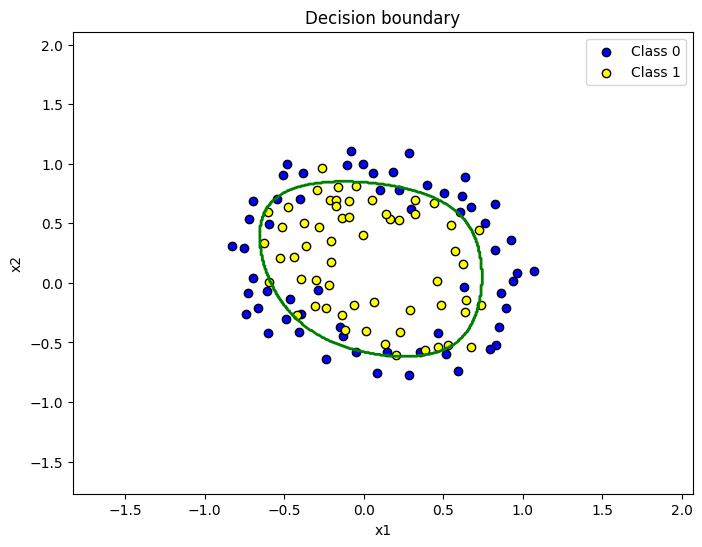

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(X1[y == 0], X2[y == 0], c='blue', label='Class 0', edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], c='yellow', label='Class 1', edgecolors='k')

x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = X2.min() - 1, X2.max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

grid_poly = features(xx.ravel(), yy.ravel(), 6)
preds = model.predict(grid_poly).reshape(xx.shape)

plt.contour(xx, yy, preds, levels=[0.5], colors='green', linewidths=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision boundary')
plt.show()

# **مسئله 2**


### **الف)**

In [40]:
x = np.linspace(0, 10, 100)

### **ب)**

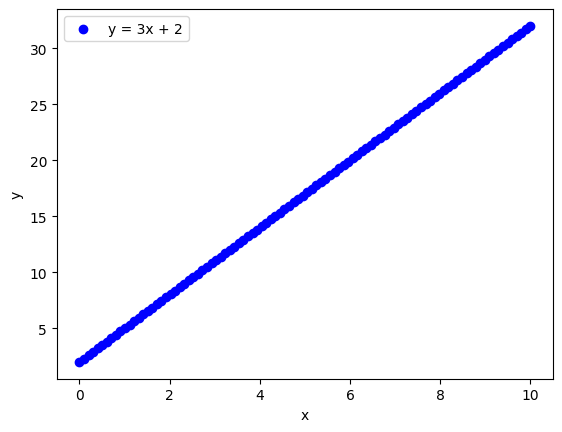

In [41]:
y = 3 * x + 2

plt.scatter(x, y, color='blue', label='y = 3x + 2')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **پ)**

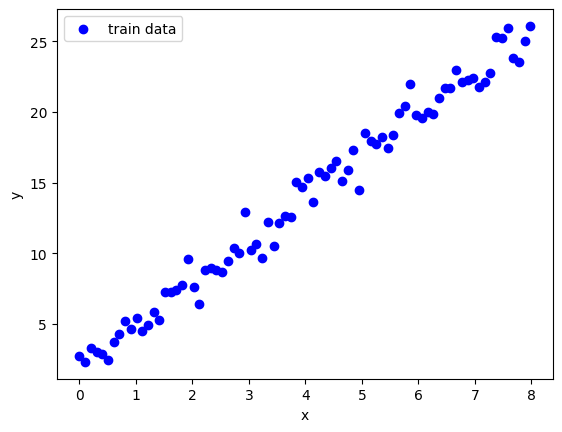

In [52]:
noise = np.random.normal(0, np.sqrt(0.8), len(x))
y_noisy = y + noise

train_size = int(0.8 * len(x))
x_train, y_train = x[:train_size], y_noisy[:train_size]
x_test, y_test = x[train_size:], y_noisy[train_size:]

plt.scatter(x_train, y_train, color='blue', label='train data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **ت)**

weight(w): 3.0764, bias(b): 1.6118


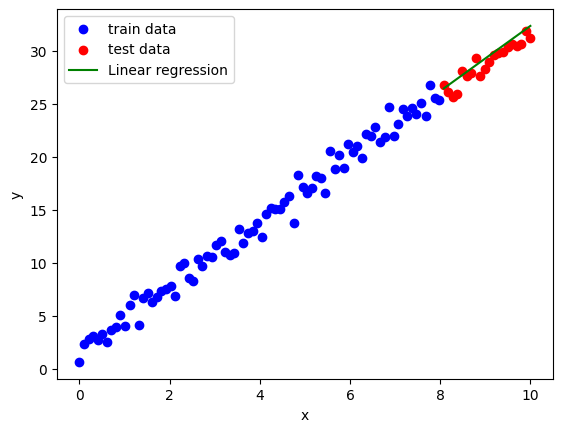

In [43]:
def linear_regression(x, y):
    n = len(x)
    x_mean, y_mean = np.mean(x), np.mean(y)
    w = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - w * x_mean
    return w, b

w, b = linear_regression(x_train, y_train)
print(f"weight(w): {w:.4f}, bias(b): {b:.4f}")

y_pred = w * x_test + b

plt.scatter(x_train, y_train, color='blue', label='train data')
plt.scatter(x_test, y_test, color='red', label='test data')
plt.plot(x_test, y_pred, color='green', label="Linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### **ث)**

In [44]:
def mse_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradients(x, y_true, y_pred):
    n = len(y_true)
    dw = -2 * np.sum(x * (y_true - y_pred)) / n
    db = -2 * np.sum(y_true - y_pred) / n
    return dw, db

### **ج)**

<ipython-input-44-75cf56208cf7>:2: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
<ipython-input-45-a4bbc526b725>:14: RuntimeWarning: invalid value encountered in multiply
  y_pred = w * x + b


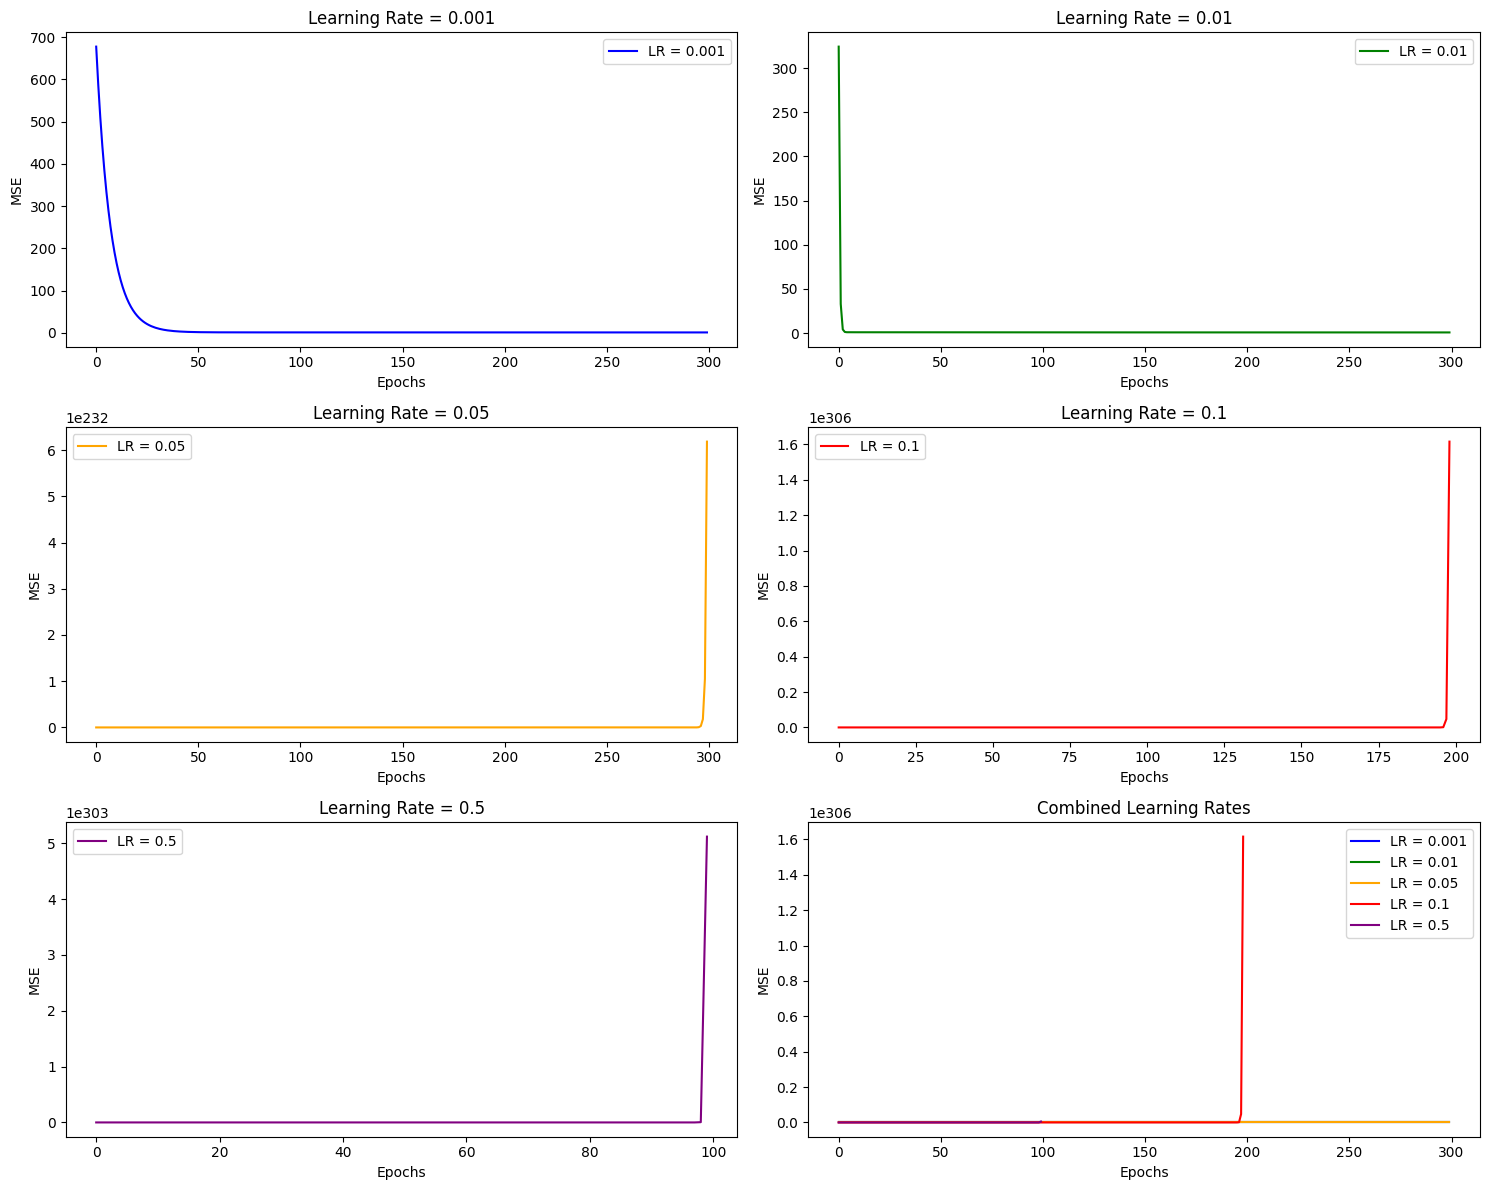

In [45]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
colors = ['blue', 'green', 'orange', 'red', 'purple']
epochs = 300

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()
all_losses = []

for i, lr in enumerate(learning_rates):
    w, b = np.random.randn(), np.random.randn()
    losses = []

    for epoch in range(epochs):
        y_pred = w * x + b
        loss = mse_error(y_noisy, y_pred)
        losses.append(loss)

        dw, db = gradients(x, y_noisy, y_pred)
        w -= lr * dw
        b -= lr * db

    all_losses.append((lr, losses, colors[i]))

    axes[i].plot(range(epochs), losses, color=colors[i], label=f"LR = {lr}")
    axes[i].set_title(f"Learning Rate = {lr}")
    axes[i].set_xlabel("Epochs")
    axes[i].set_ylabel("MSE")
    axes[i].legend()

for lr, losses, color in all_losses:
    axes[-1].plot(range(epochs), losses, color=color, label=f"LR = {lr}")
axes[-1].set_title("Combined Learning Rates")
axes[-1].set_xlabel("Epochs")
axes[-1].set_ylabel("MSE")
axes[-1].legend()
plt.tight_layout()
plt.show()

Epoch 0: Loss = 1153.7458, w = 1.2720, b = 1.2001
Epoch 1: Loss = 114.4935, w = 2.5098, b = 1.3889
Epoch 2: Loss = 11.4187, w = 2.8994, b = 1.4501
Epoch 3: Loss = 1.1950, w = 3.0218, b = 1.4712
Epoch 4: Loss = 0.1803, w = 3.0601, b = 1.4796
Epoch 5: Loss = 0.0791, w = 3.0719, b = 1.4840
Epoch 6: Loss = 0.0685, w = 3.0753, b = 1.4871
Epoch 7: Loss = 0.0668, w = 3.0761, b = 1.4899
Epoch 8: Loss = 0.0660, w = 3.0761, b = 1.4925
Epoch 9: Loss = 0.0654, w = 3.0759, b = 1.4950
Epoch 10: Loss = 0.0647, w = 3.0755, b = 1.4975
Epoch 11: Loss = 0.0641, w = 3.0752, b = 1.5000
Epoch 12: Loss = 0.0635, w = 3.0748, b = 1.5025
Epoch 13: Loss = 0.0628, w = 3.0744, b = 1.5050
Epoch 14: Loss = 0.0622, w = 3.0741, b = 1.5074
Epoch 15: Loss = 0.0616, w = 3.0737, b = 1.5099
Epoch 16: Loss = 0.0610, w = 3.0733, b = 1.5123
Epoch 17: Loss = 0.0604, w = 3.0730, b = 1.5147
Epoch 18: Loss = 0.0598, w = 3.0726, b = 1.5171
Epoch 19: Loss = 0.0592, w = 3.0722, b = 1.5195
Epoch 20: Loss = 0.0586, w = 3.0719, b = 1.5

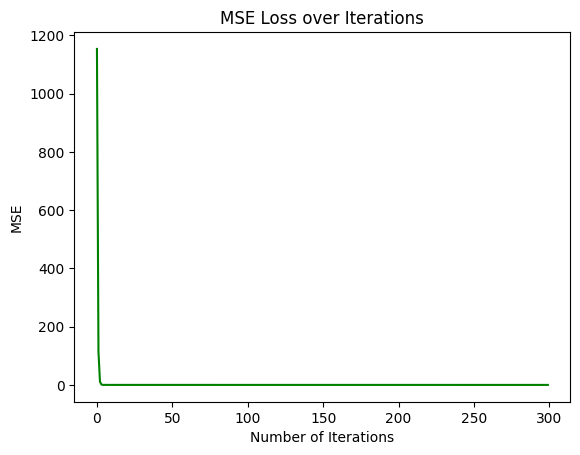

Final Weight (w): 3.0179, Final Bias (b): 1.8807


In [47]:
w, b = np.random.randn(), np.random.randn()
learning_rate = 0.01
epochs = 300
losses = []

for epoch in range(epochs):
    y_pred = w * x + b
    loss = mse_error(y, y_pred)
    losses.append(loss)
    dw, db = gradients(x, y, y_pred)

    w -= learning_rate * dw
    b -= learning_rate * db

    print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

plt.plot(range(epochs), losses, color='green')
plt.title("MSE Loss over Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.show()

print(f"Final Weight (w): {w:.4f}, Final Bias (b): {b:.4f}")

### **چ)**

Test MSE Loss: 0.4269


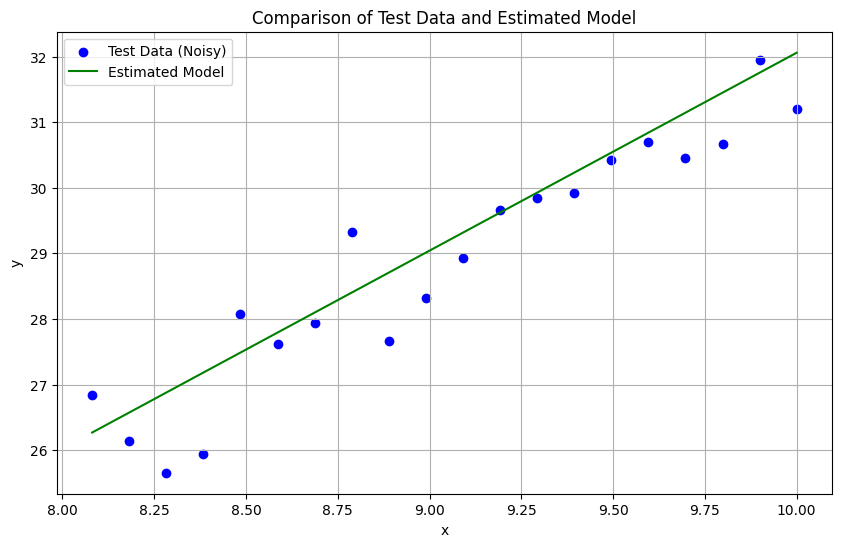

In [50]:
y_test_pred = w * x_test + b

test_loss = mse_error(y_test, y_test_pred)
print(f"Test MSE Loss: {test_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Test Data (Noisy)')
plt.plot(x_test, y_test_pred, color='green', label='Estimated Model')
plt.title("Comparison of Test Data and Estimated Model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()